## Before all , we import necessary libraries

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
import statsmodels.api as sm
from pylab import rcParams
import warnings
import itertools
from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



#### Ignoring warnings code to have a clean code

In [0]:
import warnings
warnings.simplefilter(action='ignore')

#### importing natural language processing libraries

In [0]:
##importing package and its required dictionnaries
import nltk
from nltk.corpus import wordnet 
from nltk.tree import Tree
from nltk.chunk import ne_chunk
from nltk import sentiment
from nltk.corpus import opinion_lexicon

from nltk.corpus import stopwords
 

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('universal_tagset')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('opinion_lexicon')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_

True

#### helping libraries for learning

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


Using TensorFlow backend.


#### then we load  the data (using google colab)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link='https://drive.google.com/open?id=1cjV7kCXYjeQ2UXsK9D75VoAxzMR6kTti'


In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1cjV7kCXYjeQ2UXsK9D75VoAxzMR6kTti


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')  

In [0]:
train=pd.read_csv('train.csv')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link='https://drive.google.com/open?id=1yqTUI8uahkN_GuhUuQRW1xfKa--QImIZ'


In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1yqTUI8uahkN_GuhUuQRW1xfKa--QImIZ


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv')  

In [0]:
test=pd.read_csv('test.csv')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 3 columns):
Review Text     5959 non-null object
Review Title    5959 non-null object
topic           5959 non-null object
dtypes: object(3)
memory usage: 139.7+ KB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 2 columns):
Review Text     2553 non-null object
Review Title    2553 non-null object
dtypes: object(2)
memory usage: 40.0+ KB


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link='https://drive.google.com/open?id=1L5-7ADVcfmRdmNjNKr2IOIrNAsOJPIbw'


In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1L5-7ADVcfmRdmNjNKr2IOIrNAsOJPIbw


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Sample_Submission.csv')  

In [0]:
sample_submission=pd.read_csv('Sample_Submission.csv')

In [0]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
Review Text     5 non-null object
Review Title    5 non-null object
topic           5 non-null object
dtypes: object(3)
memory usage: 200.0+ bytes


### we set the option to make data view all contents of a column

In [0]:
pd.set_option('display.max_colwidth', -1)

#### run basic descriptives 

In [0]:
train.head(10)

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything.",Useless,Shipment and delivery
1,"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything.",Useless,Not Effective
2,I have bought these bags and immediately open one put in some trash and the bag was split down the side. So I opened another bag to cover the split bag and it also split down the side(x3).Don’t buy these you will end up throwing your box away,TRASH!!! Do not buy these bags it’s a waist of time!!!,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,"These don't compare to the name brand wipes. Family of 5 little kids, we use a lot of wipes. These don't cut through sticky messes and they're small and very thin. Might be ok for wiping down less often used places but not good at tackling actual messes. I also didn't care for the lemon scent, felt it was too strong.",Can't tackle big messes,Texture
5,"These don't compare to the name brand wipes. Family of 5 little kids, we use a lot of wipes. These don't cut through sticky messes and they're small and very thin. Might be ok for wiping down less often used places but not good at tackling actual messes. I also didn't care for the lemon scent, felt it was too strong.",Can't tackle big messes,Quality/Contaminated
6,"These don't compare to the name brand wipes. Family of 5 little kids, we use a lot of wipes. These don't cut through sticky messes and they're small and very thin. Might be ok for wiping down less often used places but not good at tackling actual messes. I also didn't care for the lemon scent, felt it was too strong.",Can't tackle big messes,Color and texture
7,No good,Tastes horrible,Bad Taste/Flavor
8,These are EXTREMELY hard to swallow. The pills are huge and the sides are sharp. I seriously feel like i can choke on them. I don’t know about their effects and honestly don’t care because it’s not worth the pain and danger.,CHOKING HAZARD,Too big to swallow
9,"First of all the style I am leaving a review for is: Solimo incontinent Maximum Absorbency Long Length individually wrapped.<br />I had always used a name brand but still had to search for something better.<br />When I first ordered these, I must say I was very pleasantly surprised.<br />For my daytime use, these worked great.<br />They were very soft, long but not to long. Wide enough but not to wide.<br />And they worked for those gushes. Well for myself, I really liked them.<br />They stuck well, but not to much.<br />And then they changed the outside wrapper.<br />They used to be individually wrapped inwhich you would take off the outside wrap and then peel off the paper strip and then attach.<br />But now what they have done is they have attached the paper strip to the outer wrap covering. So now when you unwrap it, the paper strip that covers the sticky stuff comes off all at the same time. Bad move!! Picture this, you go into the bathroom to change your pad. You take the new pad and go to take the outside wrap off but now the strip that covers the sticky part comes off as well. Now you have to somehow hold that new pad while taking off the old pad and wanting to use the outside wrap to wrap the old pad up but oops, now the new pad falls to the floor because you now have to hold on to everything at the same time. I used to be able to at least recycle the paper strip but you can't anymore because the outer wrap and the paper strip are attached. Why can't they just leave things the way they were? Now I'm stuck with yet another product that is crappy. I'm just not happy about the ""new"" changes. Please bring back the old style!!!",Bring back the old style!!,Quality/Contaminated


#### we notice the presence the same feedback for several topics like the first 2 rows , it is the same feedback related to 2 different topics 

#### let's check frequency of topics  :

In [0]:
train['topic'].value_counts()

Bad Taste/Flavor           1194
Quality/Contaminated       715 
Not Effective              611 
Allergic                   567 
Packaging                  467 
Texture                    410 
Shipment and delivery      390 
Customer Service           239 
Color and texture          234 
Too big to swallow         228 
Ingredients                216 
Expiry                     136 
Smells Bad                 123 
Pricing                    107 
Wrong Product received     99  
Too Sweet                  97  
Inferior to competitors    44  
False Advertisement        37  
Didn't Like                31  
Customer Issues            8   
Hard to Chew               6   
Name: topic, dtype: int64

In [0]:
train['Review Title'].value_counts().head()

Gross           19
Disappointed    18
Bad taste       18
Yuck            18
Not good        17
Name: Review Title, dtype: int64

##In the next processing steps we need to do it for both train and test data , so we merge them to save time of running

In [0]:
train['train'] =1

In [0]:
test['train']=0

In [0]:
train=pd.concat((train , test) , axis=0)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 0 to 2552
Data columns (total 4 columns):
Review Text     8512 non-null object
Review Title    8512 non-null object
topic           5959 non-null object
train           8512 non-null int64
dtypes: int64(1), object(3)
memory usage: 332.5+ KB


#### just to confirm that we maintain index of each dataset after merging 

In [0]:
train['Review Title'][0]

0    Useless 
0    Bad tast
Name: Review Title, dtype: object

#### so we have the same [0] case one for train and one for test data

## In next steps we will extract features to classify feedbacks  

### our Idea is to consider length of feedbacks , since intuetively feedbacks about product itself should not be so long , customer just expresses his opinion 

### unlike specific issues like related to customer service or related to experience of a specific customer , this may be longer

### so we divide each feedback into words after ommiting characters that are not of interest 

#### to analyze feed back , we need to analyze text and title of each feed back word by word , 

In [0]:
 train['review_text_new']=train['Review Text'].str.lower().str.replace('<br />','').str.replace(r'[^(a-zA-Z)\s\']','').str.split()

In [0]:
 train['review_title_new']=train['Review Title'].str.lower().str.replace('<br />','').str.replace(r'[^(a-zA-Z)\s\']','').str.split()

In [0]:
 train['review_text_new'].head()

0    [did, nothing, for, me, didn't, help, lost, even, with, working, out, and, eating, healthy, didn't, curb, appetite, or, anything]                                                                                                                                                                                                                                                 
1    [did, nothing, for, me, didn't, help, lost, even, with, working, out, and, eating, healthy, didn't, curb, appetite, or, anything]                                                                                                                                                                                                                                                 
2    [i, have, bought, these, bags, and, immediately, open, one, put, in, some, trash, and, the, bag, was, split, down, the, side, so, i, opened, another, bag, to, cover, the, split, bag, and, it, also, split, down, the, side(x)dont, buy, these, yo

#### then get number of words per feedback

In [0]:
train['length']=train['review_text_new'].str.len()

In [0]:
train.head()

,Review Text,Review Title,topic,train,review_text_new,review_title_new,length
0,"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything.",Useless,Shipment and delivery,1,"[did, nothing, for, me, didn't, help, lost, even, with, working, out, and, eating, healthy, didn't, curb, appetite, or, anything]",[useless],19
1,"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything.",Useless,Not Effective,1,"[did, nothing, for, me, didn't, help, lost, even, with, working, out, and, eating, healthy, didn't, curb, appetite, or, anything]",[useless],19
2,I have bought these bags and immediately open one put in some trash and the bag was split down the side. So I opened another bag to cover the split bag and it also split down the side(x3).Don’t buy these you will end up throwing your box away,TRASH!!! Do not buy these bags it’s a waist of time!!!,Customer Service,1,"[i, have, bought, these, bags, and, immediately, open, one, put, in, some, trash, and, the, bag, was, split, down, the, side, so, i, opened, another, bag, to, cover, the, split, bag, and, it, also, split, down, the, side(x)dont, buy, these, you, will, end, up, throwing, your, box, away]","[trash, do, not, buy, these, bags, its, a, waist, of, time]",48
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic,1,"[gave, me, an, allergic, reaction, on, my, face, (]","[do, not, recommend]",9
4,"These don't compare to the name brand wipes. Family of 5 little kids, we use a lot of wipes. These don't cut through sticky messes and they're small and very thin. Might be ok for wiping down less often used places but not good at tackling actual messes. I also didn't care for the lemon scent, felt it was too strong.",Can't tackle big messes,Texture,1,"[these, don't, compare, to, the, name, brand, wipes, family, of, little, kids, we, use, a, lot, of, wipes, these, don't, cut, through, sticky, messes, and, they're, small, and, very, thin, might, be, ok, for, wiping, down, less, often, used, places, but, not, good, at, tackling, actual, messes, i, also, didn't, care, for, the, lemon, scent, felt, it, was, too, strong]","[can't, tackle, big, messes]",60


### as another helping characterestic to classify test , we count number of negative words in rach review text and review title , getting its percentage of the whole number of words in text and title  

#### first : we define dictionnary of negative words

In [0]:
neg=list(opinion_lexicon.negative())

#### then define a function to count negative words in each list of words  

In [0]:
def negative (sentence):

    neg_words = 0
    

    for word in sentence :

        if word in neg :
            neg_words += 1
        else:
           pass

    
    return(neg_words)
    

In [0]:
import time
start_time = time.time()


#### we aply this function to count negative words in review test and title , store them as columns in the data

In [0]:
train['negative'] = train['review_text_new'].apply(negative)

In [0]:
train['negative_title']=train['Review Title'].str.lower().str.replace(r'[^(a-zA-Z)\s\']','').str.split().apply(negative)

In [0]:
train.head()

,Review Text,Review Title,topic,train,review_text_new,review_title_new,length,negative,negative_title
0,"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything.",Useless,Shipment and delivery,1,"[did, nothing, for, me, didn't, help, lost, even, with, working, out, and, eating, healthy, didn't, curb, appetite, or, anything]",[useless],19,1,1
1,"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything.",Useless,Not Effective,1,"[did, nothing, for, me, didn't, help, lost, even, with, working, out, and, eating, healthy, didn't, curb, appetite, or, anything]",[useless],19,1,1
2,I have bought these bags and immediately open one put in some trash and the bag was split down the side. So I opened another bag to cover the split bag and it also split down the side(x3).Don’t buy these you will end up throwing your box away,TRASH!!! Do not buy these bags it’s a waist of time!!!,Customer Service,1,"[i, have, bought, these, bags, and, immediately, open, one, put, in, some, trash, and, the, bag, was, split, down, the, side, so, i, opened, another, bag, to, cover, the, split, bag, and, it, also, split, down, the, side(x)dont, buy, these, you, will, end, up, throwing, your, box, away]","[trash, do, not, buy, these, bags, its, a, waist, of, time]",48,4,1
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic,1,"[gave, me, an, allergic, reaction, on, my, face, (]","[do, not, recommend]",9,1,0
4,"These don't compare to the name brand wipes. Family of 5 little kids, we use a lot of wipes. These don't cut through sticky messes and they're small and very thin. Might be ok for wiping down less often used places but not good at tackling actual messes. I also didn't care for the lemon scent, felt it was too strong.",Can't tackle big messes,Texture,1,"[these, don't, compare, to, the, name, brand, wipes, family, of, little, kids, we, use, a, lot, of, wipes, these, don't, cut, through, sticky, messes, and, they're, small, and, very, thin, might, be, ok, for, wiping, down, less, often, used, places, but, not, good, at, tackling, actual, messes, i, also, didn't, care, for, the, lemon, scent, felt, it, was, too, strong]","[can't, tackle, big, messes]",60,4,1


#### then we adjust number of negative words in text and title to be not count of words , but the percentage of words in title or text

In [0]:
train['negative_adj']=np.where (train['length']>0 ,train['negative']*100/train['length'],0)

In [0]:
train['negative_title_adj']=np.where (train['review_title_new'].str.len()>0 ,train['negative_title']*100/train['review_title_new'].str.len(),0)

#### just as an indicator we get average of length , negative words pct (negative_adj) , and negative words pct of title (negative_title_adj) per topic 

In [0]:
train.groupby(['topic'])['length' , 'negative_adj' , 'negative_title_adj'].agg({'length':'mean' , 'negative_adj':'mean' ,'negative_title_adj':'mean'})

,length,negative_adj,negative_title_adj
topic,,,
Allergic,63.128748,6.837973,20.421024
Bad Taste/Flavor,48.953099,6.997524,20.393590
Color and texture,59.692308,5.870817,17.444716
Customer Issues,56.750000,3.102103,13.541667
Customer Service,46.276151,4.688075,15.895193
Didn't Like,41.935484,3.708540,11.076665
Expiry,39.625000,5.502984,22.670967
False Advertisement,66.486486,3.699583,29.357504
Hard to Chew,34.833333,4.345663,10.185185


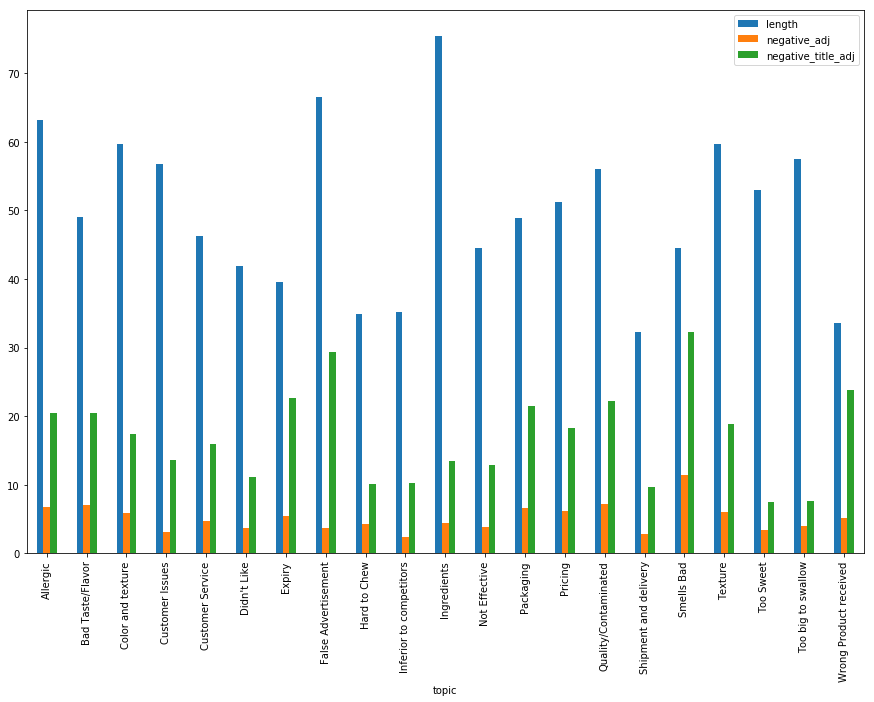

In [106]:
train.groupby(['topic'])['length' , 'negative_adj' , 'negative_title_adj'].agg({'length':'mean' , 'negative_adj':'mean' ,'negative_title_adj':'mean'}).plot(kind='bar' , figsize=(15,10))

### in the above graph , we notice that the 3 factors vary from a topic than another , thus they are valid to be in our model to classify review topic

#### we generate column for topic word by word in case if needed later 

In [0]:
train['topic_new']=train['topic'].str.lower().str.replace('/',' ').str.replace(r'[^(a-zA-Z)\s\']','').str.split()

## Another characterestic is the keywords :

### we take the most frequent 20 words in review text related to each topic , then we count how many of these key words found in review text 

### then we do the same with review titles.

#### first we define the function that takes the most frequent words in a column of texts (we design this functions to take only words in review text that only found under a specific topic i.e we exclude texts that are labeled muiltiple times under several topics ) 

#### of course we exclude stop words like is , the ........ etc

In [0]:
def words (data , topic_column , topic , text , list_text):

    def ios(sent  ):
        if sent in list(set(data.loc[data[topic_column] == topic , : ][text])-set(data.loc[data[topic_column] != topic , : ][text])):
          return(True)
        else :
          return(False)

    
    mask=(data[text]).apply(ios)
    c=[]
    for i in data[mask][list_text]:
      for j in i :
        if j not in set(stopwords.words('english')) and len(j) > 1 :      
           c.append(j)
        else :
          pass

    return (pd.Series(c).value_counts().head(20))


#### then we get the most frequent 20 words in review text for each topic 

In [0]:
t=[]
for i in list(set(train.loc[train['train']==1,'topic'])) :
  
  a=words(train,'topic' ,i ,'Review Text' ,'review_text_new')
  t.append(a)

#### so now we have the top 20 words , in the review text for reviews under each of the 21 topics 

#### i.e , below we have the top 20 words regarding the topic "packaging"

In [0]:
m1=list(set(train.loc[train['train']==1,'topic']))

In [108]:
m1[0]

'Packaging'

In [107]:
t[0]

broken      133
bottle      120
product     107
box         99 
seal        70 
opened      53 
one         52 
like        49 
received    46 
arrived     45 
open        42 
came        42 
brand       40 
package     37 
bottles     37 
return      36 
get         36 
damaged     35 
time        34 
item        32 
dtype: int64

#### to do the same with review titles 

In [0]:
u=[]
for i in list(set(train.loc[train['train']==1,'topic'])) :
  
  a=words(train,'topic' ,i ,'Review Title' ,'review_title_new')
  u.append(a)

#### then we attach a column in the dataset includes how many keywords in each review text  that are related to each topic    

In [0]:
m=[]
for h in range(len(t)):
    v=[]
    for i in train['review_text_new']:
      
      a=[]
      for word in i:
        if word in list(t[h].index):
            a.append(word)
        else : 
          pass
      v.append(len(a))
    m.append(v)

In [0]:
len(m)

21

In [0]:
for i in range(len(m)):
  train[(list(set(train.loc[train['train']==1,'topic'])))[i]+'_words'] = m[i]


In [0]:
len(u)

21

#### then we do the same for review title

In [0]:
m=[]
for h in range(len(u)):
    v=[]
    for i in train['review_title_new']:
      
      a=[]
      for word in i:
        if word in list(u[h].index):
            a.append(word)
        else : 
          pass
      v.append(len(a))
    m.append(v)

In [0]:
for i in range(len(m)):
  train[(list(set(train.loc[train['train']==1,'topic'])))[i]+'_title'] = m[i]

#### in the later prediction steps , we would need to code the topics , since it will be difficuklt to predict strings , so we generate a new column includes topics coded 

In [0]:
r={}
for i in range(len(m1)):
  r[m1[i]] = i+1

In [0]:
r

{'Allergic': 16,
 'Bad Taste/Flavor': 17,
 'Color and texture': 10,
 'Customer Issues': 8,
 'Customer Service': 6,
 "Didn't Like": 15,
 'Expiry': 5,
 'False Advertisement': 7,
 'Hard to Chew': 11,
 'Inferior to competitors': 12,
 'Ingredients': 18,
 'Not Effective': 4,
 'Packaging': 1,
 'Pricing': 21,
 'Quality/Contaminated': 14,
 'Shipment and delivery': 19,
 'Smells Bad': 3,
 'Texture': 20,
 'Too Sweet': 13,
 'Too big to swallow': 9,
 'Wrong Product received': 2}

#### later , we include these codes in the dataset

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 0 to 2552
Data columns (total 54 columns):
Review Text                      8512 non-null object
Review Title                     8512 non-null object
topic                            5959 non-null object
train                            8512 non-null int64
review_text_new                  8512 non-null object
review_title_new                 8512 non-null object
length                           8512 non-null int64
negative                         8512 non-null int64
negative_title                   8512 non-null int64
negative_adj                     8512 non-null float64
negative_title_adj               8512 non-null float64
topic_new                        5959 non-null object
Packaging_words                  8512 non-null int64
Wrong Product received_words     8512 non-null int64
Smells Bad_words                 8512 non-null int64
Not Effective_words              8512 non-null int64
Expiry_words                     85

#### for better estimation , we transform columns that include number of keywords related to each topic  included in the review text   to be binary (i.e. if the maximum number of the keywords found in the text related to the topic it equals = 1 , else = 0) 

In [0]:
 train['max']= train.iloc[: , 12:32].max(axis=1)

In [0]:
for i in train.columns[12:32]:
  train[i] = np.where((train[i]==train['max']) & (train['max'] > 0)  , 1 , 0)

#### doing the same for review title

In [0]:
 train['max_title']= train.iloc[: , 33:53].max(axis=1)

In [0]:
for i in train.columns[33:53]:
  train[i] = np.where((train[i]==train['max_title']) & (train['max_title'] > 0) , 1 , 0)

#### then check how data looks

In [0]:
train.head()

,Review Text,Review Title,topic,train,review_text_new,review_title_new,length,negative,negative_title,negative_adj,negative_title_adj,topic_new,Packaging_words,Wrong Product received_words,Smells Bad_words,Not Effective_words,Expiry_words,Customer Service_words,False Advertisement_words,Customer Issues_words,Too big to swallow_words,Color and texture_words,Hard to Chew_words,Inferior to competitors_words,Too Sweet_words,Quality/Contaminated_words,Didn't Like_words,Allergic_words,Bad Taste/Flavor_words,Ingredients_words,Shipment and delivery_words,Texture_words,Pricing_words,Packaging_title,Wrong Product received_title,Smells Bad_title,Not Effective_title,Expiry_title,Customer Service_title,False Advertisement_title,Customer Issues_title,Too big to swallow_title,Color and texture_title,Hard to Chew_title,Inferior to competitors_title,Too Sweet_title,Quality/Contaminated_title,Didn't Like_title,Allergic_title,Bad Taste/Flavor_title,Ingredients_title,Shipment and delivery_title,Texture_title,Pricing_title,max,max_title
0,"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything.",Useless,Shipment and delivery,1,"[did, nothing, for, me, didn't, help, lost, even, with, working, out, and, eating, healthy, didn't, curb, appetite, or, anything]",[useless],19,1,1,5.263158,100.000000,"[shipment, and, delivery]",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
1,"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything.",Useless,Not Effective,1,"[did, nothing, for, me, didn't, help, lost, even, with, working, out, and, eating, healthy, didn't, curb, appetite, or, anything]",[useless],19,1,1,5.263158,100.000000,"[not, effective]",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
2,I have bought these bags and immediately open one put in some trash and the bag was split down the side. So I opened another bag to cover the split bag and it also split down the side(x3).Don’t buy these you will end up throwing your box away,TRASH!!! Do not buy these bags it’s a waist of time!!!,Customer Service,1,"[i, have, bought, these, bags, and, immediately, open, one, put, in, some, trash, and, the, bag, was, split, down, the, side, so, i, opened, another, bag, to, cover, the, split, bag, and, it, also, split, down, the, side(x)dont, buy, these, you, will, end, up, throwing, your, box, away]","[trash, do, not, buy, these, bags, its, a, waist, of, time]",48,4,1,8.333333,9.090909,"[customer, service]",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,2
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic,1,"[gave, me, an, allergic, reaction, on, my, face, (]","[do, not, recommend]",9,1,0,11.111111,0.000000,[allergic],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1
4,"These don't compare to the name brand wipes. Family of 5 little kids, we use a lot of wipes. These don't cut through sticky messes and they're small and very thin. Might be ok for wiping down less often used places but not good at tackling actual messes. I also didn't care for the lemon scent, felt it was too strong.",Can't tackle big messes,Texture,1,"[these, don't, compare, to, the, name, brand, wipes, family, of, little, kids, we, use, a, lot, of, wipes, these, don't, cut, through, sticky, messes, and, they're, small, and, very, thin, might, be, ok, for, wiping, down, less, often, used, places, but, not, good, at, tackling, actual, messes, i, also, didn't, care, for, the, lemon, scent, felt, it, was, too, strong]","[can't, tackle, big, messes]",60,4,1,6.666667,25.000000,[texture],0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1


#### finally we merge topics coded to use in estimation

In [0]:
train['topic_coded'] = train['topic'].map(r)

#### remove redundant columns 

In [0]:
train.drop(columns=['max','max_title'] , inplace=True)

In [0]:
train.drop(columns=['negative','negative_title'] , inplace=True)

### Then re divide data to train and test sets 

In [0]:
train['train'].value_counts()

1    5959
0    2553
Name: train, dtype: int64

In [0]:
train_final=train.loc[train['train']==1 , :]

In [0]:
test_final=train.loc[train['train']==0 , :]

In [0]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 5958
Data columns (total 53 columns):
Review Text                      5959 non-null object
Review Title                     5959 non-null object
topic                            5959 non-null object
train                            5959 non-null int64
review_text_new                  5959 non-null object
review_title_new                 5959 non-null object
length                           5959 non-null int64
negative_adj                     5959 non-null float64
negative_title_adj               5959 non-null float64
topic_new                        5959 non-null object
Packaging_words                  5959 non-null int64
Wrong Product received_words     5959 non-null int64
Smells Bad_words                 5959 non-null int64
Not Effective_words              5959 non-null int64
Expiry_words                     5959 non-null int64
Customer Service_words           5959 non-null int64
False Advertisement_words        59

In [0]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 0 to 2552
Data columns (total 53 columns):
Review Text                      2553 non-null object
Review Title                     2553 non-null object
topic                            0 non-null object
train                            2553 non-null int64
review_text_new                  2553 non-null object
review_title_new                 2553 non-null object
length                           2553 non-null int64
negative_adj                     2553 non-null float64
negative_title_adj               2553 non-null float64
topic_new                        0 non-null object
Packaging_words                  2553 non-null int64
Wrong Product received_words     2553 non-null int64
Smells Bad_words                 2553 non-null int64
Not Effective_words              2553 non-null int64
Expiry_words                     2553 non-null int64
Customer Service_words           2553 non-null int64
False Advertisement_words        2553 non

###Finally : We start Estimation

#### first we divide data to X and Y t oease processing

In [0]:
y_train=train_final.iloc[:, [52]]

In [0]:
x_train=train_final.iloc[: , 6:51].drop(columns=['topic_new'])

In [0]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 5958
Data columns (total 44 columns):
length                           5959 non-null int64
negative_adj                     5959 non-null float64
negative_title_adj               5959 non-null float64
Packaging_words                  5959 non-null int64
Wrong Product received_words     5959 non-null int64
Smells Bad_words                 5959 non-null int64
Not Effective_words              5959 non-null int64
Expiry_words                     5959 non-null int64
Customer Service_words           5959 non-null int64
False Advertisement_words        5959 non-null int64
Customer Issues_words            5959 non-null int64
Too big to swallow_words         5959 non-null int64
Color and texture_words          5959 non-null int64
Hard to Chew_words               5959 non-null int64
Inferior to competitors_words    5959 non-null int64
Too Sweet_words                  5959 non-null int64
Quality/Contaminated_words       5959 non

In [0]:
x_train.head()

,length,negative_adj,negative_title_adj,Packaging_words,Wrong Product received_words,Smells Bad_words,Not Effective_words,Expiry_words,Customer Service_words,False Advertisement_words,Customer Issues_words,Too big to swallow_words,Color and texture_words,Hard to Chew_words,Inferior to competitors_words,Too Sweet_words,Quality/Contaminated_words,Didn't Like_words,Allergic_words,Bad Taste/Flavor_words,Ingredients_words,Shipment and delivery_words,Texture_words,Pricing_words,Packaging_title,Wrong Product received_title,Smells Bad_title,Not Effective_title,Expiry_title,Customer Service_title,False Advertisement_title,Customer Issues_title,Too big to swallow_title,Color and texture_title,Hard to Chew_title,Inferior to competitors_title,Too Sweet_title,Quality/Contaminated_title,Didn't Like_title,Allergic_title,Bad Taste/Flavor_title,Ingredients_title,Shipment and delivery_title,Texture_title
0,19,5.263158,100.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,5.263158,100.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,48,8.333333,9.090909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,11.111111,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,60,6.666667,25.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 5958
Data columns (total 1 columns):
topic_coded    5959 non-null float64
dtypes: float64(1)
memory usage: 93.1 KB


#### then divide train data itself to train and test subsets to test algorithm before applying it to the test data

In [0]:
# Organize our data for training
X = x_train
Y = y_train
X, X_Val, Y, Y_Val = train_test_split(X, Y , train_size =0.7 , shuffle=True)

#### we start by multinomial naive bayesian

In [0]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB


# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X, Y)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_Val)

# Calculate the accuracy score: score
score = metrics.accuracy_score(Y_Val, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(Y_Val, pred , average='weighted')
print('F score is:',f1)

Accuracy is: 0.19966442953020133
F score is: 0.21963498803064724


#### as we see performance is week  , try another algorithm 

RAndomforest classifier 

In [0]:
# Organize our data for training
X = x_train
Y = y_train
X, X_Val, Y, Y_Val = train_test_split(X, Y , train_size =0.7 , shuffle=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:

clf = RandomForestClassifier(random_state=51)
# Fit the classifier to the training data
clf.fit(X,Y)

# Create the predicted tags: pred
pred = clf.predict(X_Val)

# Calculate the accuracy score: score
score = metrics.accuracy_score(Y_Val, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(Y_Val, pred , average='weighted')
print('F score is:',f1)

Accuracy is: 0.32941834451901564
F score is: 0.3215126975544334


#### it gives better performance , just we need to perform grid search to reach the parameters that give the best estimation 

In [0]:
# Organize our data for training
X = x_train
Y = y_train
X, X_Val, Y, Y_Val = train_test_split(X, Y , train_size =0.7 , shuffle=True)

In [0]:
import warnings
warnings.simplefilter(action='ignore')

In [0]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

scorer = metrics.make_scorer(metrics.fbeta_score, beta=0.5 , average='weighted')

parameters = {'n_estimators': [100], 'max_features': [18,19,20,21], 'max_depth': [40,50,70],
              'min_samples_split':[2,3],'min_samples_leaf':[3,5,7]}

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X, Y )

# Get the estimator
best_clf = grid_fit.best_estimator_

best_predictions = best_clf.predict(X_Val)

score = metrics.accuracy_score(Y_Val, best_predictions)
print('Accuracy is:',score)
f1 = metrics.f1_score(Y_Val, best_predictions , average='weighted')
print('F score is:',f1)

Accuracy is: 0.4446308724832215
F score is: 0.42156394355088345


#### then we apply the best estimate to our test data to get the sample submision

In [0]:
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features=18, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
x_test=test_final.iloc[: , 6:51].drop(columns=['topic_new'])

In [0]:
x_test.head()

,length,negative_adj,negative_title_adj,Packaging_words,Wrong Product received_words,Smells Bad_words,Not Effective_words,Expiry_words,Customer Service_words,False Advertisement_words,Customer Issues_words,Too big to swallow_words,Color and texture_words,Hard to Chew_words,Inferior to competitors_words,Too Sweet_words,Quality/Contaminated_words,Didn't Like_words,Allergic_words,Bad Taste/Flavor_words,Ingredients_words,Shipment and delivery_words,Texture_words,Pricing_words,Packaging_title,Wrong Product received_title,Smells Bad_title,Not Effective_title,Expiry_title,Customer Service_title,False Advertisement_title,Customer Issues_title,Too big to swallow_title,Color and texture_title,Hard to Chew_title,Inferior to competitors_title,Too Sweet_title,Quality/Contaminated_title,Didn't Like_title,Allergic_title,Bad Taste/Flavor_title,Ingredients_title,Shipment and delivery_title,Texture_title
0,17,0.000000,50.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,17,0.000000,50.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4,25.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,330,1.515152,14.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,330,1.515152,14.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### then we predict 

In [0]:
best_predictions_2 = best_clf.predict(x_test)

#### recode prediction to the original topic names 

In [0]:
inv_map = {v: k for k, v in r.items()}


In [0]:
topic_test=pd.Series(best_predictions_2).map(inv_map)

#### finally store prediction in a deataset , import it in cv format 

In [0]:
final_submission= pd.concat( [test_final.loc[ : ,['Review Text' ,'Review Title']] , topic_test] , axis=1)

final_submission.columns=['Review Text' ,'Review Title' ,'topic']




In [0]:
final_submission.head()

,Review Text,Review Title,topic
0,I use chia seed in my protein shakes. These tasted like they were moldy. Throw them out,Bad tast,Bad Taste/Flavor
1,I use chia seed in my protein shakes. These tasted like they were moldy. Throw them out,Bad tast,Bad Taste/Flavor
2,Don’t waste your money.,No change. No results.,Not Effective
3,"I use the book 'Fortify Your Life' by Tieraona Low Dog, MD to help me make more informed decisions regarding supplements. I went over this supplement from ""X Brand"" elements & found some negatives if you're not Vegan:<br /><br />Contains Folate as Folic Acid. Folic Acid is the synthetic form of Folate.<br />Vitamin B12 as cyanocobalamin. Cyanocobalamin is the synthetic form. this is a supplement that is targeted to Vegans. So this may not be an issue depending on what you are looking for. However, the body is better able to absorb Methylcobalamin, it is the form of B12 the body needs.<br />Vitamin C as ascorbic acid. Ascorbic Acid is the synthetic form of Vit.C<br />Vitamin D2 - this is a supplement that is targeted to Vegans. So this may not be an issue depending on what you are looking for. However, the body is better able to absorb D3. D3 is the optimal choice for good health.<br />Chromium as Chromium Chloride. Chromium Chloride is the least absorbed form.<br />Contains Iron. This may not be an issue depending on what you are looking for. Teenage boys, adult men, women with very infrequent menstrual cycles, & postmenopausal women should NOT take multivitamins with iron.<br />The probiotics are a joke. There is no guarantee that you will get live beneficial bacteria at the time of consumption. Any good probiotic supplier will guarantee a particular amount of viable probiotic strain/s at the time of consumption (it will say it right on the label).<br /><br />Personally, I feel that the Pure Synergy brand is the better choice for supplements. I tend to use them most of the time. There is another brand, Mega Food backed by Dr. Low Dog that I haven't used, so I cannot speak on it's quality, but you may wish to check it out if you don't want/like the Synergy brand.<br /><br />Overall, this is a reasonable multivitamin for Vegans due to ethical reasons for being Vegan, not for actual good health. But with that said, it's better than not taking a multivitamin at all.","Good Vegan Choice, Poor Non Vegan Choice",Quality/Contaminated
4,"I use the book 'Fortify Your Life' by Tieraona Low Dog, MD to help me make more informed decisions regarding supplements. I went over this supplement from ""X Brand"" elements & found some negatives if you're not Vegan:<br /><br />Contains Folate as Folic Acid. Folic Acid is the synthetic form of Folate.<br />Vitamin B12 as cyanocobalamin. Cyanocobalamin is the synthetic form. this is a supplement that is targeted to Vegans. So this may not be an issue depending on what you are looking for. However, the body is better able to absorb Methylcobalamin, it is the form of B12 the body needs.<br />Vitamin C as ascorbic acid. Ascorbic Acid is the synthetic form of Vit.C<br />Vitamin D2 - this is a supplement that is targeted to Vegans. So this may not be an issue depending on what you are looking for. However, the body is better able to absorb D3. D3 is the optimal choice for good health.<br />Chromium as Chromium Chloride. Chromium Chloride is the least absorbed form.<br />Contains Iron. This may not be an issue depending on what you are looking for. Teenage boys, adult men, women with very infrequent menstrual cycles, & postmenopausal women should NOT take multivitamins with iron.<br />The probiotics are a joke. There is no guarantee that you will get live beneficial bacteria at the time of consumption. Any good probiotic supplier will guarantee a particular amount of viable probiotic strain/s at the time of consumption (it will say it right on the label).<br /><br />Personally, I feel that the Pure Synergy brand is the better choice for supplements. I tend to use them most of the

In [0]:
final_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 0 to 2552
Data columns (total 3 columns):
Review Text     2553 non-null object
Review Title    2553 non-null object
topic           2553 non-null object
dtypes: object(3)
memory usage: 79.8+ KB


In [0]:
sample_submission=final_submission.to_csv('sample_submission.csv')